In [2]:
! pip install cooler
! pip install cooltools
! pip install gdown

In [3]:
import gdown
import glob
import cooler
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import cooltools
import bioframe

In [4]:
! mkdir data

In [ ]:
gdown.download_folder("https://drive.google.com/drive/folders/1uIAsVJF-JTjkHK7VPAP8FcocDrNkoIKs", output="./data/hic")

In [9]:
HiCs = glob.glob("data/hic/HiC*.mcool")
HiCs

['data/hic/HiC1.dm3.mapq_30.1000.mcool',
 'data/hic/HiC2.dm3.mapq_30.1000.mcool',
 'data/hic/HiC3.dm3.mapq_30.1000.mcool',
 'data/hic/HiC4.dm3.mapq_30.1000.mcool']

In [10]:
for i in HiCs:
  print(cooler.fileops.list_coolers(i))

['/resolutions/1000', '/resolutions/2000', '/resolutions/5000', '/resolutions/10000', '/resolutions/20000', '/resolutions/40000', '/resolutions/50000', '/resolutions/100000', '/resolutions/250000', '/resolutions/500000']
['/resolutions/1000', '/resolutions/2000', '/resolutions/5000', '/resolutions/10000', '/resolutions/20000', '/resolutions/40000', '/resolutions/50000', '/resolutions/100000', '/resolutions/250000', '/resolutions/500000']
['/resolutions/1000', '/resolutions/2000', '/resolutions/5000', '/resolutions/10000', '/resolutions/20000', '/resolutions/40000', '/resolutions/50000', '/resolutions/100000', '/resolutions/250000', '/resolutions/500000']
['/resolutions/1000', '/resolutions/2000', '/resolutions/5000', '/resolutions/10000', '/resolutions/20000', '/resolutions/40000', '/resolutions/50000', '/resolutions/100000', '/resolutions/250000', '/resolutions/500000']


In [11]:
RES = 10000
chr = "chrX"
my_range = (chr, 2_000_000, 3_500_000)

In [12]:
cool_strs = ['data/hic/HiC1.dm3.mapq_30.1000.mcool::resolutions/10000',
             'data/hic/HiC2.dm3.mapq_30.1000.mcool::resolutions/10000',
             'data/hic/HiC3.dm3.mapq_30.1000.mcool::resolutions/10000',
             'data/hic/HiC4.dm3.mapq_30.1000.mcool::resolutions/10000']
objects = []

for i in range(len(HiCs)):
  objects.append(cooler.Cooler(cool_strs[i]))

objects

[<Cooler "HiC1.dm3.mapq_30.1000.mcool::/resolutions/10000">,
 <Cooler "HiC2.dm3.mapq_30.1000.mcool::/resolutions/10000">,
 <Cooler "HiC3.dm3.mapq_30.1000.mcool::/resolutions/10000">,
 <Cooler "HiC4.dm3.mapq_30.1000.mcool::/resolutions/10000">]

### получаю информацию и атрибуты матрицы Hi-C с помощью cooler.info

In [13]:
num = 1
for obj in objects:
  print(f"{num}:")
  print(f"INFO: {obj.info}")
  print(f"BINSIZE: {obj.binsize}")
  print(f"CHROMNAMES: {obj.chromnames}")
  print(f"CHROMSIZES: {list(obj.chromsizes)}")
  print()
  num += 1

1:
INFO: {'bin-size': 10000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:38:39.059783', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 12044, 'nchroms': 7, 'nnz': 11146004, 'storage-mode': 'symmetric-upper', 'sum': 63912926}
BINSIZE: 10000
CHROMNAMES: ['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX', 'chrM']
CHROMSIZES: [23011544, 21146708, 24543557, 27905053, 1351857, 22422827, 19517]

2:
INFO: {'bin-size': 10000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:16:30.289988', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 12044, 'nchroms': 7, 'nnz': 11522171, 'storage-mode': 'symmetric-upper', 'sum': 61819050}
BINSIZE: 10000
CHROMNAMES: ['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX', 'chrM']


### открываю объекты cooler как сбалансированные матрицы для внутрихромосомных контактов

In [14]:
ms = []
for obj in objects:
  m = obj.matrix(balance=True).fetch(chr)
  ms.append(m)
  print(f"{len(ms)}:\n{m}")

1:
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan 0.89857834 ...        nan 0.                nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan 0.         ...        nan 1.95029858        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
2:
[[           nan            nan            nan ...            nan
             nan            nan]
 [           nan            nan            nan ...            nan
             nan            nan]
 [           nan            nan 8.75982413e-01 ...            nan
  8.30529439e-04            nan]
 ...
 [           nan            nan            nan ...            nan
             nan            nan]
 [           nan            nan 8.30529439e-04 ...            nan
  1.33627078e+00            nan]
 [           nan            nan            nan ...

### получаю таблицы с бинами

In [15]:
num = 1
for obj in objects:
  print(f"{num}:\n{obj.bins().fetch(chr)}")
  num += 1

1:
      chrom     start       end    weight
9799   chrX         0     10000       NaN
9800   chrX     10000     20000       NaN
9801   chrX     20000     30000  0.023351
9802   chrX     30000     40000  0.019533
9803   chrX     40000     50000  0.019066
...     ...       ...       ...       ...
12037  chrX  22380000  22390000  0.027800
12038  chrX  22390000  22400000  0.028367
12039  chrX  22400000  22410000       NaN
12040  chrX  22410000  22420000  0.039901
12041  chrX  22420000  22422827       NaN

[2243 rows x 4 columns]
2:
      chrom     start       end    weight
9799   chrX         0     10000       NaN
9800   chrX     10000     20000       NaN
9801   chrX     20000     30000  0.023347
9802   chrX     30000     40000  0.018839
9803   chrX     40000     50000  0.017830
...     ...       ...       ...       ...
12037  chrX  22380000  22390000  0.026820
12038  chrX  22390000  22400000  0.026246
12039  chrX  22400000  22410000       NaN
12040  chrX  22410000  22420000  0.035573
120

### получаю таблицы в командной строке командой *cooler dump*

In [16]:
! cooler dump --balanced --table pixels --header --join ./data/hic/HiC1.dm3.mapq_30.1000.mcool::resolutions/10000 | head -10 > data/tables1.txt 
! echo "" >> data/tables1.txt
! cooler dump --balanced --table bins --header --join ./data/hic/HiC1.dm3.mapq_30.1000.mcool::resolutions/10000 | head -10 >> data/tables1.txt

! cooler dump --balanced --table pixels --header --join ./data/hic/HiC2.dm3.mapq_30.1000.mcool::resolutions/10000 | head -10 > data/tables2.txt 
! echo "" >> data/tables2.txt
! cooler dump --balanced --table bins --header --join ./data/hic/HiC2.dm3.mapq_30.1000.mcool::resolutions/10000 | head -10 >> data/tables2.txt

! cooler dump --balanced --table pixels --header --join ./data/hic/HiC3.dm3.mapq_30.1000.mcool::resolutions/10000 | head -10 > data/tables3.txt 
! echo "" >> data/tables3.txt
! cooler dump --balanced --table bins --header --join ./data/hic/HiC3.dm3.mapq_30.1000.mcool::resolutions/10000 | head -10 >> data/tables3.txt

! cooler dump --balanced --table pixels --header --join ./data/hic/HiC4.dm3.mapq_30.1000.mcool::resolutions/10000 | head -10 > data/tables4.txt 
! echo "" >> data/tables4.txt
! cooler dump --balanced --table bins --header --join ./data/hic/HiC4.dm3.mapq_30.1000.mcool::resolutions/10000 | head -10 >> data/tables4.txt

#### полученные таблицы

т.к. сами таблицы относительно большие, сохранял только первые 10 строк каждой для наглядности

In [17]:
! cat data/tables1.txt

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr2L	0	10000	chr2L	0	10000	1605	1.46554
chr2L	0	10000	chr2L	10000	20000	281	0.148303
chr2L	0	10000	chr2L	20000	30000	87	0.038671
chr2L	0	10000	chr2L	30000	40000	45	0.0233181
chr2L	0	10000	chr2L	40000	50000	27	0.018678
chr2L	0	10000	chr2L	50000	60000	31	0.0184843
chr2L	0	10000	chr2L	60000	70000	37	0.0152419
chr2L	0	10000	chr2L	70000	80000	18	0.00832226
chr2L	0	10000	chr2L	80000	90000	15	0.00655779

chrom	start	end	weight
chr2L	0	10000	0.0302177
chr2L	10000	20000	0.0174656
chr2L	20000	30000	0.0147097
chr2L	30000	40000	0.0171483
chr2L	40000	50000	0.0228932
chr2L	50000	60000	0.0197325
chr2L	60000	70000	0.0136326
chr2L	70000	80000	0.0153006
chr2L	80000	90000	0.0144679


In [18]:
! cat data/tables2.txt

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr2L	0	10000	chr2L	0	10000	1513	1.29961
chr2L	0	10000	chr2L	10000	20000	324	0.158483
chr2L	0	10000	chr2L	20000	30000	90	0.0376726
chr2L	0	10000	chr2L	30000	40000	43	0.0202351
chr2L	0	10000	chr2L	40000	50000	45	0.0304869
chr2L	0	10000	chr2L	50000	60000	21	0.0117211
chr2L	0	10000	chr2L	60000	70000	30	0.0123099
chr2L	0	10000	chr2L	70000	80000	15	0.0067006
chr2L	0	10000	chr2L	80000	90000	13	0.00550784

chrom	start	end	weight
chr2L	0	10000	0.029308
chr2L	10000	20000	0.0166898
chr2L	20000	30000	0.0142823
chr2L	30000	40000	0.0160565
chr2L	40000	50000	0.0231161
chr2L	50000	60000	0.0190442
chr2L	60000	70000	0.0140006
chr2L	70000	80000	0.0152418
chr2L	80000	90000	0.0144561


In [19]:
! cat data/tables3.txt

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr2L	0	10000	chr2L	40000	50000	1	
chr2L	10000	20000	chr2L	10000	20000	2	
chr2L	10000	20000	chr2L	390000	400000	1	
chr2L	10000	20000	chr2L	5800000	5810000	1	
chr2L	10000	20000	chr2R	6050000	6060000	1	
chr2L	10000	20000	chr2R	12580000	12590000	1	
chr2L	10000	20000	chrX	5570000	5580000	1	
chr2L	10000	20000	chrX	18950000	18960000	1	
chr2L	20000	30000	chr2L	30000	40000	2	

chrom	start	end	weight
chr2L	0	10000	
chr2L	10000	20000	
chr2L	20000	30000	
chr2L	30000	40000	
chr2L	40000	50000	
chr2L	50000	60000	
chr2L	60000	70000	0.0380535
chr2L	70000	80000	0.0256692
chr2L	80000	90000	0.0205886


In [20]:
! cat data/tables4.txt

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr2L	10000	20000	chr2L	10000	20000	1	
chr2L	40000	50000	chr3R	10800000	10810000	1	
chr2L	50000	60000	chr2L	50000	60000	58	
chr2L	50000	60000	chr2L	60000	70000	63	
chr2L	50000	60000	chr2L	70000	80000	48	
chr2L	50000	60000	chr2L	80000	90000	21	
chr2L	50000	60000	chr2L	90000	100000	9	
chr2L	50000	60000	chr2L	100000	110000	9	
chr2L	50000	60000	chr2L	110000	120000	7	

chrom	start	end	weight
chr2L	0	10000	
chr2L	10000	20000	
chr2L	20000	30000	
chr2L	30000	40000	
chr2L	40000	50000	
chr2L	50000	60000	
chr2L	60000	70000	0.0330388
chr2L	70000	80000	0.0220987
chr2L	80000	90000	0.0172551


### строю кривые зависимости числа контактов от расстояния для выбранной хромосомы (в логарифмических-координатах) для 4х реплик

/tmp/ipykernel_283477/4202136547.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(ms[0]))


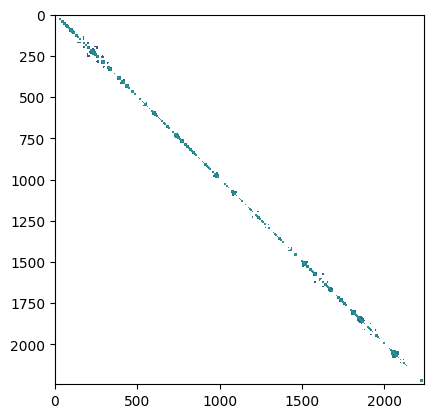

In [21]:
plt.imshow(np.log(ms[0]))

/tmp/ipykernel_283477/1824831949.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(ms[1]))


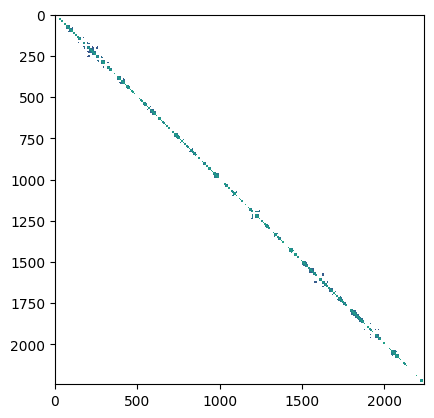

In [22]:
plt.imshow(np.log(ms[1]))

/tmp/ipykernel_283477/3257115959.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(ms[2]))


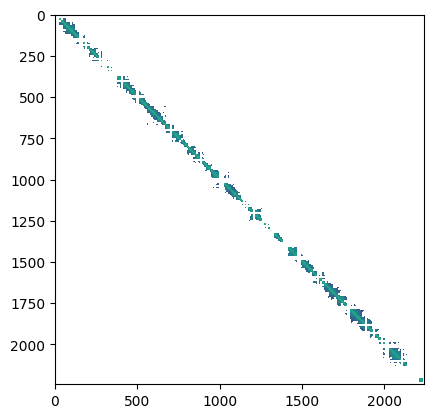

In [23]:
plt.imshow(np.log(ms[2]))

/tmp/ipykernel_283477/3551626537.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(ms[3]))


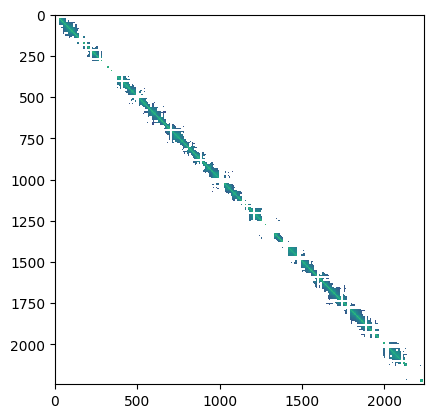

In [24]:
plt.imshow(np.log(ms[3]))

/tmp/ipykernel_283477/1170485552.py:4: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m,i))
/tmp/ipykernel_283477/1170485552.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m))*RES,np.log(z))
  2%|▏         | 4.19M/248M [39:59<38:44:12, 1.75kB/s]


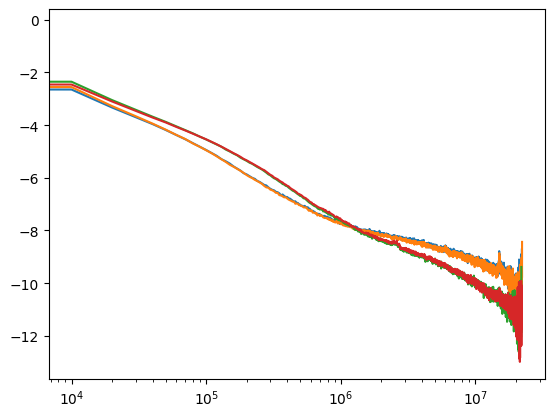

In [25]:
for m in ms:
  z=np.zeros(len(m))
  for i in range(len(m)):
    z[i]=np.nanmean(np.diagonal(m,i))

  plt.plot(np.arange(len(m))*RES,np.log(z))
  plt.xscale('log')
plt.show()

### для выбранного участка нахожу insulation score и границы тадов для всех реплик

In [26]:
ins = []
windowbp = [3 * RES, 5 * RES, 10 * RES]
for obj in objects:
  ins.append(cooltools.insulation(clr=obj, window_bp=windowbp))

INFO:root:fallback to serial implementation.
INFO:root:fallback to serial implementation.
INFO:root:fallback to serial implementation.
INFO:root:fallback to serial implementation.


In [27]:
ins[0]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_30000,n_valid_pixels_30000,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_100000,n_valid_pixels_100000,boundary_strength_30000,boundary_strength_50000,boundary_strength_100000,is_boundary_30000,is_boundary_50000,is_boundary_100000
0,chr2L,0,10000,chr2L,False,0.273152,1.0,0.332911,3.0,0.618747,8.0,NaN,NaN,NaN,False,False,False
1,chr2L,10000,20000,chr2L,False,0.072146,3.0,0.301227,7.0,0.567368,17.0,NaN,NaN,NaN,False,False,False
2,chr2L,20000,30000,chr2L,False,0.242245,6.0,0.646625,12.0,0.801080,27.0,NaN,NaN,NaN,False,False,False
3,chr2L,30000,40000,chr2L,False,0.748422,6.0,0.582777,17.0,0.723293,37.0,NaN,NaN,NaN,False,False,False
4,chr2L,40000,50000,chr2L,False,0.916235,6.0,0.371356,22.0,0.523749,47.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12039,chrX,22400000,22410000,chrX,True,0.621518,2.0,0.855019,3.0,1.191197,6.0,NaN,NaN,NaN,False,False,False
12040,chrX,22410000,22420000,chrX,False,0.757195,1.0,1.208406,2.0,1.341588,5.0,NaN,NaN,NaN,False,False,False
12041,chrX,22420000,22422827,chrX,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
12042,chrM,0,10000,chrM,False,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False


In [28]:
ins[1]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_30000,n_valid_pixels_30000,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_100000,n_valid_pixels_100000,boundary_strength_30000,boundary_strength_50000,boundary_strength_100000,is_boundary_30000,is_boundary_50000,is_boundary_100000
0,chr2L,0,10000,chr2L,False,0.205495,1.0,0.446235,3.0,0.589404,8.0,NaN,NaN,NaN,False,False,False
1,chr2L,10000,20000,chr2L,False,-0.046746,3.0,0.314531,7.0,0.534387,17.0,NaN,NaN,NaN,False,False,False
2,chr2L,20000,30000,chr2L,False,0.297150,6.0,0.687059,12.0,0.846804,27.0,NaN,NaN,NaN,False,False,False
3,chr2L,30000,40000,chr2L,False,0.839304,6.0,0.668320,17.0,0.806063,37.0,NaN,NaN,NaN,False,False,False
4,chr2L,40000,50000,chr2L,False,1.049371,6.0,0.446201,22.0,0.604785,47.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12039,chrX,22400000,22410000,chrX,True,0.831029,2.0,1.074261,3.0,1.419656,6.0,NaN,NaN,NaN,False,False,False
12040,chrX,22410000,22420000,chrX,False,1.136023,1.0,1.441988,2.0,1.559400,5.0,NaN,NaN,NaN,False,False,False
12041,chrX,22420000,22422827,chrX,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
12042,chrM,0,10000,chrM,False,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False


In [29]:
ins[2]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_30000,n_valid_pixels_30000,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_100000,n_valid_pixels_100000,boundary_strength_30000,boundary_strength_50000,boundary_strength_100000,is_boundary_30000,is_boundary_50000,is_boundary_100000
0,chr2L,0,10000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
1,chr2L,10000,20000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
2,chr2L,20000,30000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
3,chr2L,30000,40000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
4,chr2L,40000,50000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12039,chrX,22400000,22410000,chrX,True,1.176336,2.0,1.365654,3.0,1.573088,6.0,NaN,NaN,NaN,False,False,False
12040,chrX,22410000,22420000,chrX,False,1.357478,1.0,1.710235,2.0,1.760789,5.0,NaN,NaN,NaN,False,False,False
12041,chrX,22420000,22422827,chrX,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
12042,chrM,0,10000,chrM,False,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False


In [30]:
ins[3]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_30000,n_valid_pixels_30000,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_100000,n_valid_pixels_100000,boundary_strength_30000,boundary_strength_50000,boundary_strength_100000,is_boundary_30000,is_boundary_50000,is_boundary_100000
0,chr2L,0,10000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
1,chr2L,10000,20000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
2,chr2L,20000,30000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
3,chr2L,30000,40000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
4,chr2L,40000,50000,chr2L,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12039,chrX,22400000,22410000,chrX,True,1.230127,2.0,1.376696,3.0,1.515515,6.0,NaN,NaN,NaN,False,False,False
12040,chrX,22410000,22420000,chrX,False,1.479142,1.0,1.753205,2.0,1.702538,5.0,NaN,NaN,NaN,False,False,False
12041,chrX,22420000,22422827,chrX,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
12042,chrM,0,10000,chrM,False,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False


In [31]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [32]:
def create_plot(obj, ins_table, rng):
    win = 3 * RES

    data = obj.matrix(balance=True).fetch(rng)
    f, ax = plt.subplots(figsize=(18, 6))
    im = pcolormesh_45deg(ax, data, start=rng[1], resolution=RES, norm=matplotlib.colors.LogNorm(vmax=0.1, vmin=0.001))
    ax.set_aspect(0.5)
    ax.set_ylim(0, 10 * win)
    format_ticks(ax, rotate=False)
    ax.xaxis.set_visible(False)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
    plt.colorbar(im, cax=cax)
    insul_region = bioframe.select(ins_table, rng)
    ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

    # found boundaries
    boundaries = insul_region[insul_region[f"boundary_strength_{win}"].notnull()]
    # print(boundaries)

    # found weak boundaries
    weaks = boundaries.loc[boundaries[f"is_boundary_{win}"] == False]

    # found strong boundaries
    strongs = boundaries.loc[boundaries[f"is_boundary_{win}"] == True]

    # plotting boundaries
    ins_ax.scatter(weaks["start"],
                   weaks[f"log2_insulation_score_{win}"],
                   label="weak")
    ins_ax.scatter(strongs["start"],
                   strongs[f"log2_insulation_score_{win}"],
                   label="strong")

    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(win)],
            label=f'Window {win} bp')
    ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4)
    format_ticks(ins_ax, y=False, rotate=False)
    ax.set_xlim(rng[1], rng[2])

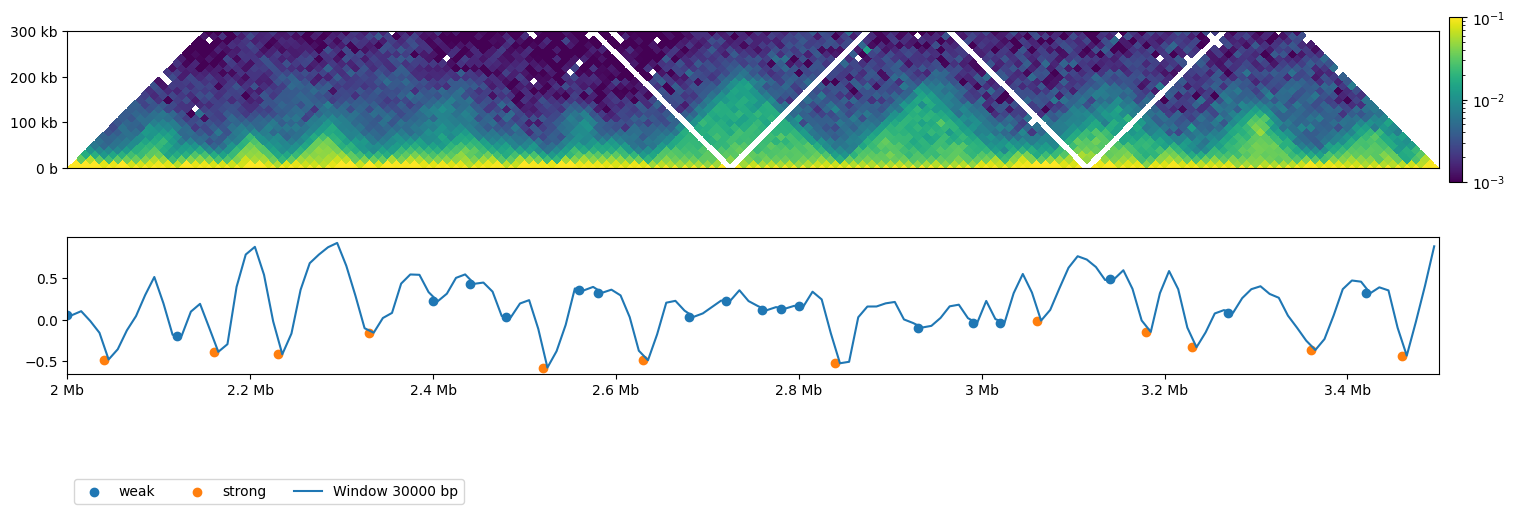

In [33]:
create_plot(objects[0], ins[0], my_range)

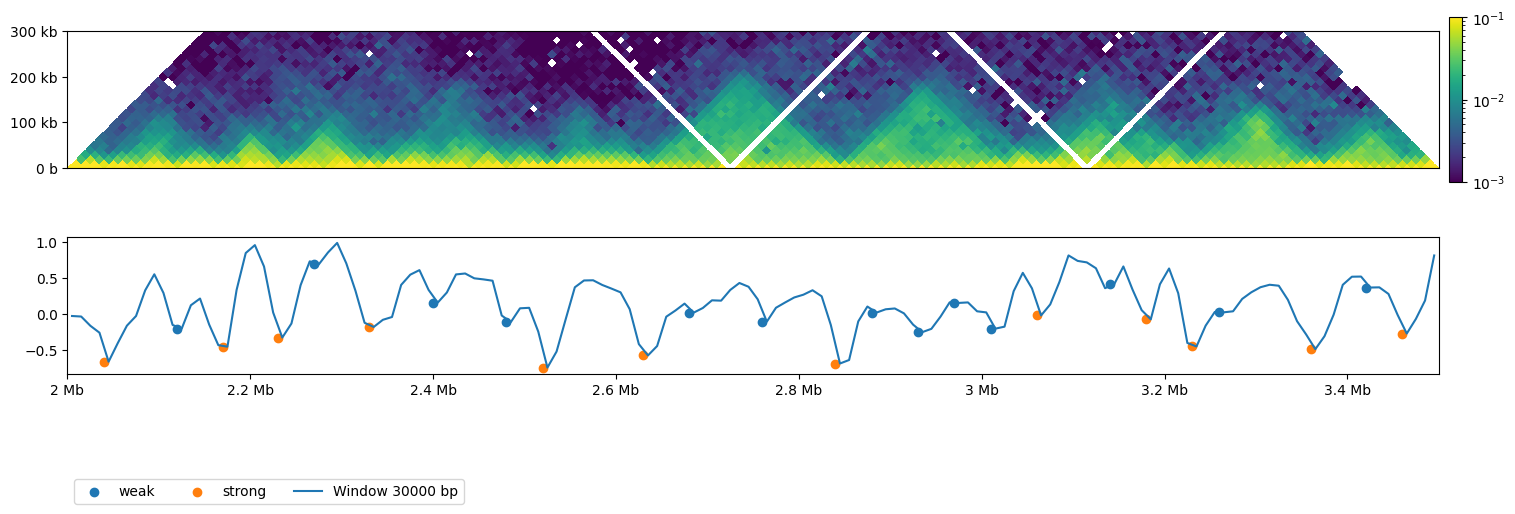

In [34]:
create_plot(objects[1], ins[1], my_range)

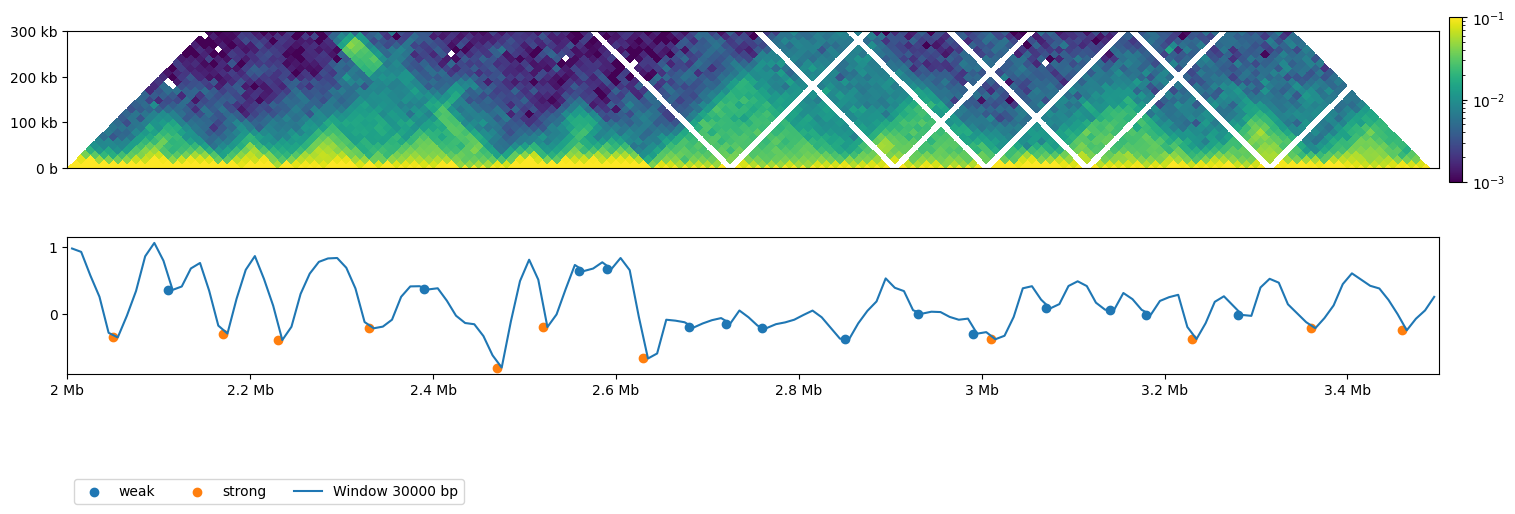

In [35]:
create_plot(objects[2], ins[2], my_range)

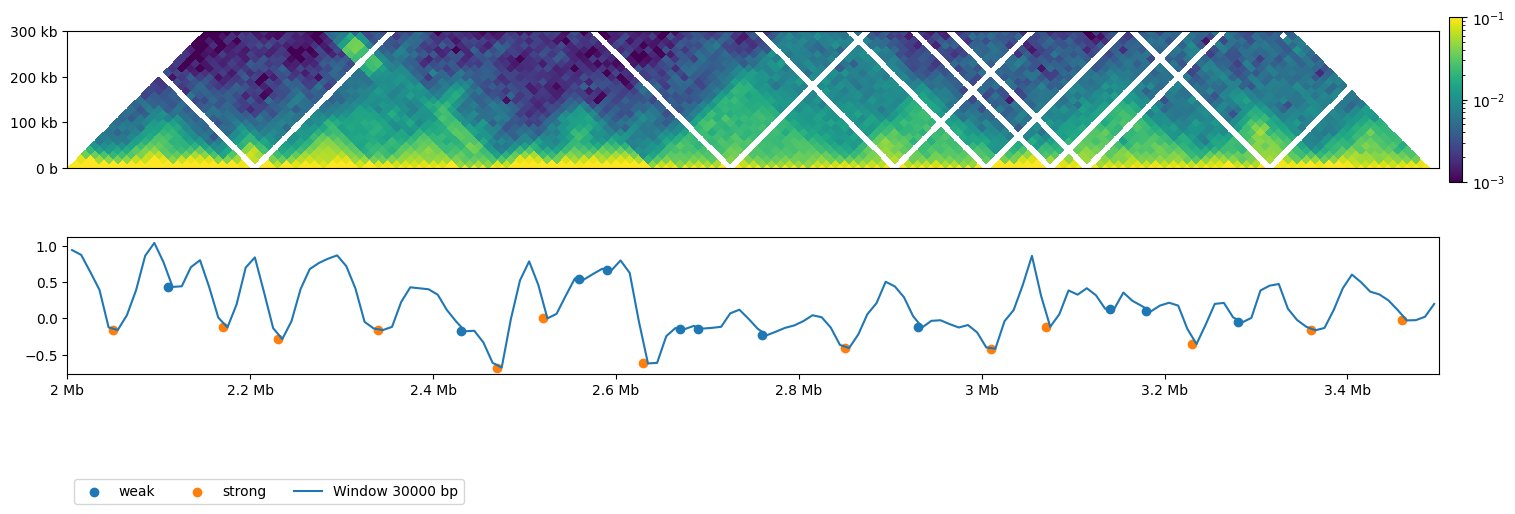

In [36]:
create_plot(objects[3], ins[3], my_range)

In [37]:
for i in range(4):
  t = ins[i].loc[ins[i].is_boundary_30000 == True].loc[:, ['chrom','start','end','boundary_strength_30000']]
  t.to_csv(f"data/{i}.bed", index=False)